# MiBici Analisis
En este notebook se demostraran los diferentes analisis que se aplicaron al dataset de MiBici el cual consiste en 334 registros en donde se hizo un conteo de los viajes que se realizaron durante el año 2019. 
Se proponen dos diferentes DataSet:


*   RecordPerDayMean: Se toma en consideracion el tiempo de duracion de los viajes en base a la media(promedio).
*   RecordPerDayMode: Se toma en consideracion el tiempo de duracion de los viajes en base a la moda




In [0]:
#Librerias necesarias para el analisis
import pandas as pd
import numpy as np

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
#sklearn.utils.multiclass.type_of_target
from sklearn.utils.multiclass import type_of_target
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
          
sn.set_style('whitegrid')
sn.set_context('talk')

In [0]:
#Leer Archivos
datos_mean_df = pd.read_csv("/content/MibiciTripsMean2.csv")
datos_mode_df = pd.read_csv("/content/MibiciTripsMode3.csv")

In [0]:
datos_mode_df = pd.read_csv("/content/MibiciTripsMode2.csv")

In [0]:
datos_mean_df.head()

,Fecha Inicio Viaje,Fecha Fin Viaje,Temporada,ID Origen,ID Destino,Tiempo,Viaje
0,01/01/2019,01/01/2019,1,50,50,5.077633,5204
1,02/01/2019,02/01/2019,1,51,51,8.121890,18328
2,03/01/2019,03/01/2019,1,51,51,5.580443,19778
3,04/01/2019,04/01/2019,1,51,51,7.455323,20346
4,05/01/2019,05/01/2019,1,51,51,4.800544,15432


In [0]:
datos_mode_df.head()

,Fecha Inicio Viaje,Fecha Fin Viaje,Temporada,ID Origen,ID Destino,Tiempo,Viaje
0,01/01/2019,01/01/2019,1,50,50,5,5204
1,02/01/2019,02/01/2019,1,51,51,6,18328
2,03/01/2019,03/01/2019,1,51,51,6,19778
3,04/01/2019,04/01/2019,1,51,51,5,20346
4,05/01/2019,05/01/2019,1,51,51,7,15432


In [0]:
#Revisar los tipos de datos - Mean
datos_mean_df.dtypes

Fecha Inicio Viaje     object
Fecha Fin Viaje        object
Temporada               int64
ID Origen              object
ID Destino             object
Tiempo                float64
Viaje                   int64
dtype: object

In [0]:
#Revisar los tipos de datos - Mode
datos_mode_df.dtypes

Fecha Inicio Viaje    object
Fecha Fin Viaje       object
Temporada              int64
ID Origen             object
ID Destino            object
Tiempo                object
Viaje                  int64
dtype: object

In [59]:
#Convertimos los datos a sus respectivos formatos - Mean
datos_mean_df["Fecha Inicio Viaje"] = pd.to_datetime(datos_mean_df["Fecha Inicio Viaje"])
datos_mean_df["Fecha Fin Viaje"] = pd.to_datetime(datos_mean_df["Fecha Fin Viaje"])
datos_mean_df['Temporada'] = datos_mean_df['Temporada'].astype('category')
datos_mean_df['ID Origen'] = datos_mean_df['ID Origen'].astype('category')
datos_mean_df['ID Destino'] = datos_mean_df['ID Destino'].astype('category')
datos_mean_df.dtypes

Fecha Inicio Viaje    datetime64[ns]
Fecha Fin Viaje       datetime64[ns]
Temporada                   category
ID Origen                   category
ID Destino                  category
Tiempo                       float64
Viaje                          int64
dtype: object

In [60]:
#Convertimos los datos a sus respectivos formatos - Mean
datos_mode_df["Fecha Inicio Viaje"] = pd.to_datetime(datos_mode_df["Fecha Inicio Viaje"])
datos_mode_df["Fecha Fin Viaje"] = pd.to_datetime(datos_mode_df["Fecha Fin Viaje"])
datos_mode_df['Tiempo'] = datos_mode_df['Tiempo'].astype('float64')
datos_mode_df['Temporada'] = datos_mode_df['Temporada'].astype('category')
datos_mode_df['ID Origen'] = datos_mode_df['ID Origen'].astype('category')
datos_mode_df['ID Destino'] = datos_mode_df['ID Destino'].astype('category')
datos_mode_df.dtypes


Fecha Inicio Viaje    datetime64[ns]
Fecha Fin Viaje       datetime64[ns]
Temporada                   category
ID Origen                   category
ID Destino                  category
Tiempo                       float64
Viaje                          int64
dtype: object

#Analisis de la informacion
Ya con la informacion cargada y con los datos requerido para el analisis hay que empezar a explorar los datos.

[Text(0.5, 1.0, 'Distribucion de viajes de acuerdo a la temporada')]

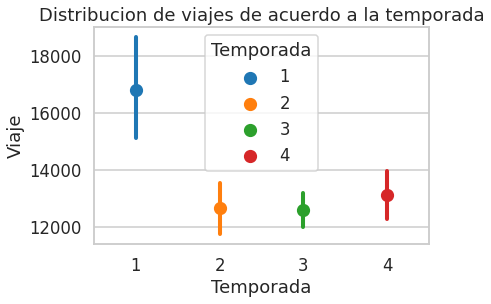

In [0]:
#Nota solo se elaboro para un DataSet ya que el tiempo que se analiza es el mismo
fig,ax = plt.subplots()
sn.pointplot(data=datos_mean_df[['Tiempo',
                           'Viaje',
                           'Temporada']],
             x='Temporada',y='Viaje',
             hue='Temporada',ax=ax,scale=1)
ax.set(title="Distribucion de viajes de acuerdo a la temporada")
#fig.set_size_inches(50,30)

In [0]:
#La estacion de origen mas popular en todo el año
moda_origen = datos_mean_df["ID Origen"].mode()[0]
print("La Estación de origen más utilizada es la número: ", moda_origen)

La Estación de origen más utilizada es la número:  51


In [0]:
#La estacion de destino mas popular en todo el año
moda_origen = datos_mean_df["ID Destino"].mode()[0]
print("La Estación de origen más utilizada es la número: ", moda_origen)

La Estación de origen más utilizada es la número:  51


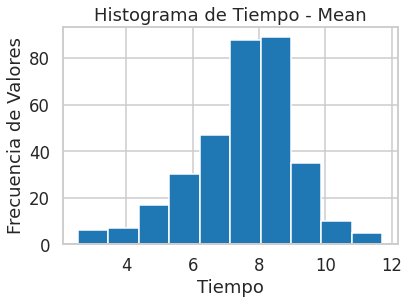

In [0]:
#Distribucion de los viajes Mean
datos_mean_df["Tiempo"].plot(kind = "hist");
plt.title("Histograma de Tiempo - Mean");
plt.xlabel("Tiempo");
plt.ylabel("Frecuencia de Valores");


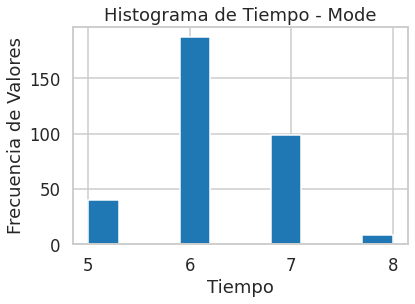

In [0]:
#Distribucion de los viajes Mode
datos_mode_df["Tiempo"].plot(kind = "hist");
plt.title("Histograma de Tiempo - Mode");
plt.xlabel("Tiempo");
plt.ylabel("Frecuencia de Valores");


En base a las graficas anteriores podemos demostrar que si existe una diferencia en base a la mediay la moda de acuerdo a la distribucion de los viajes.

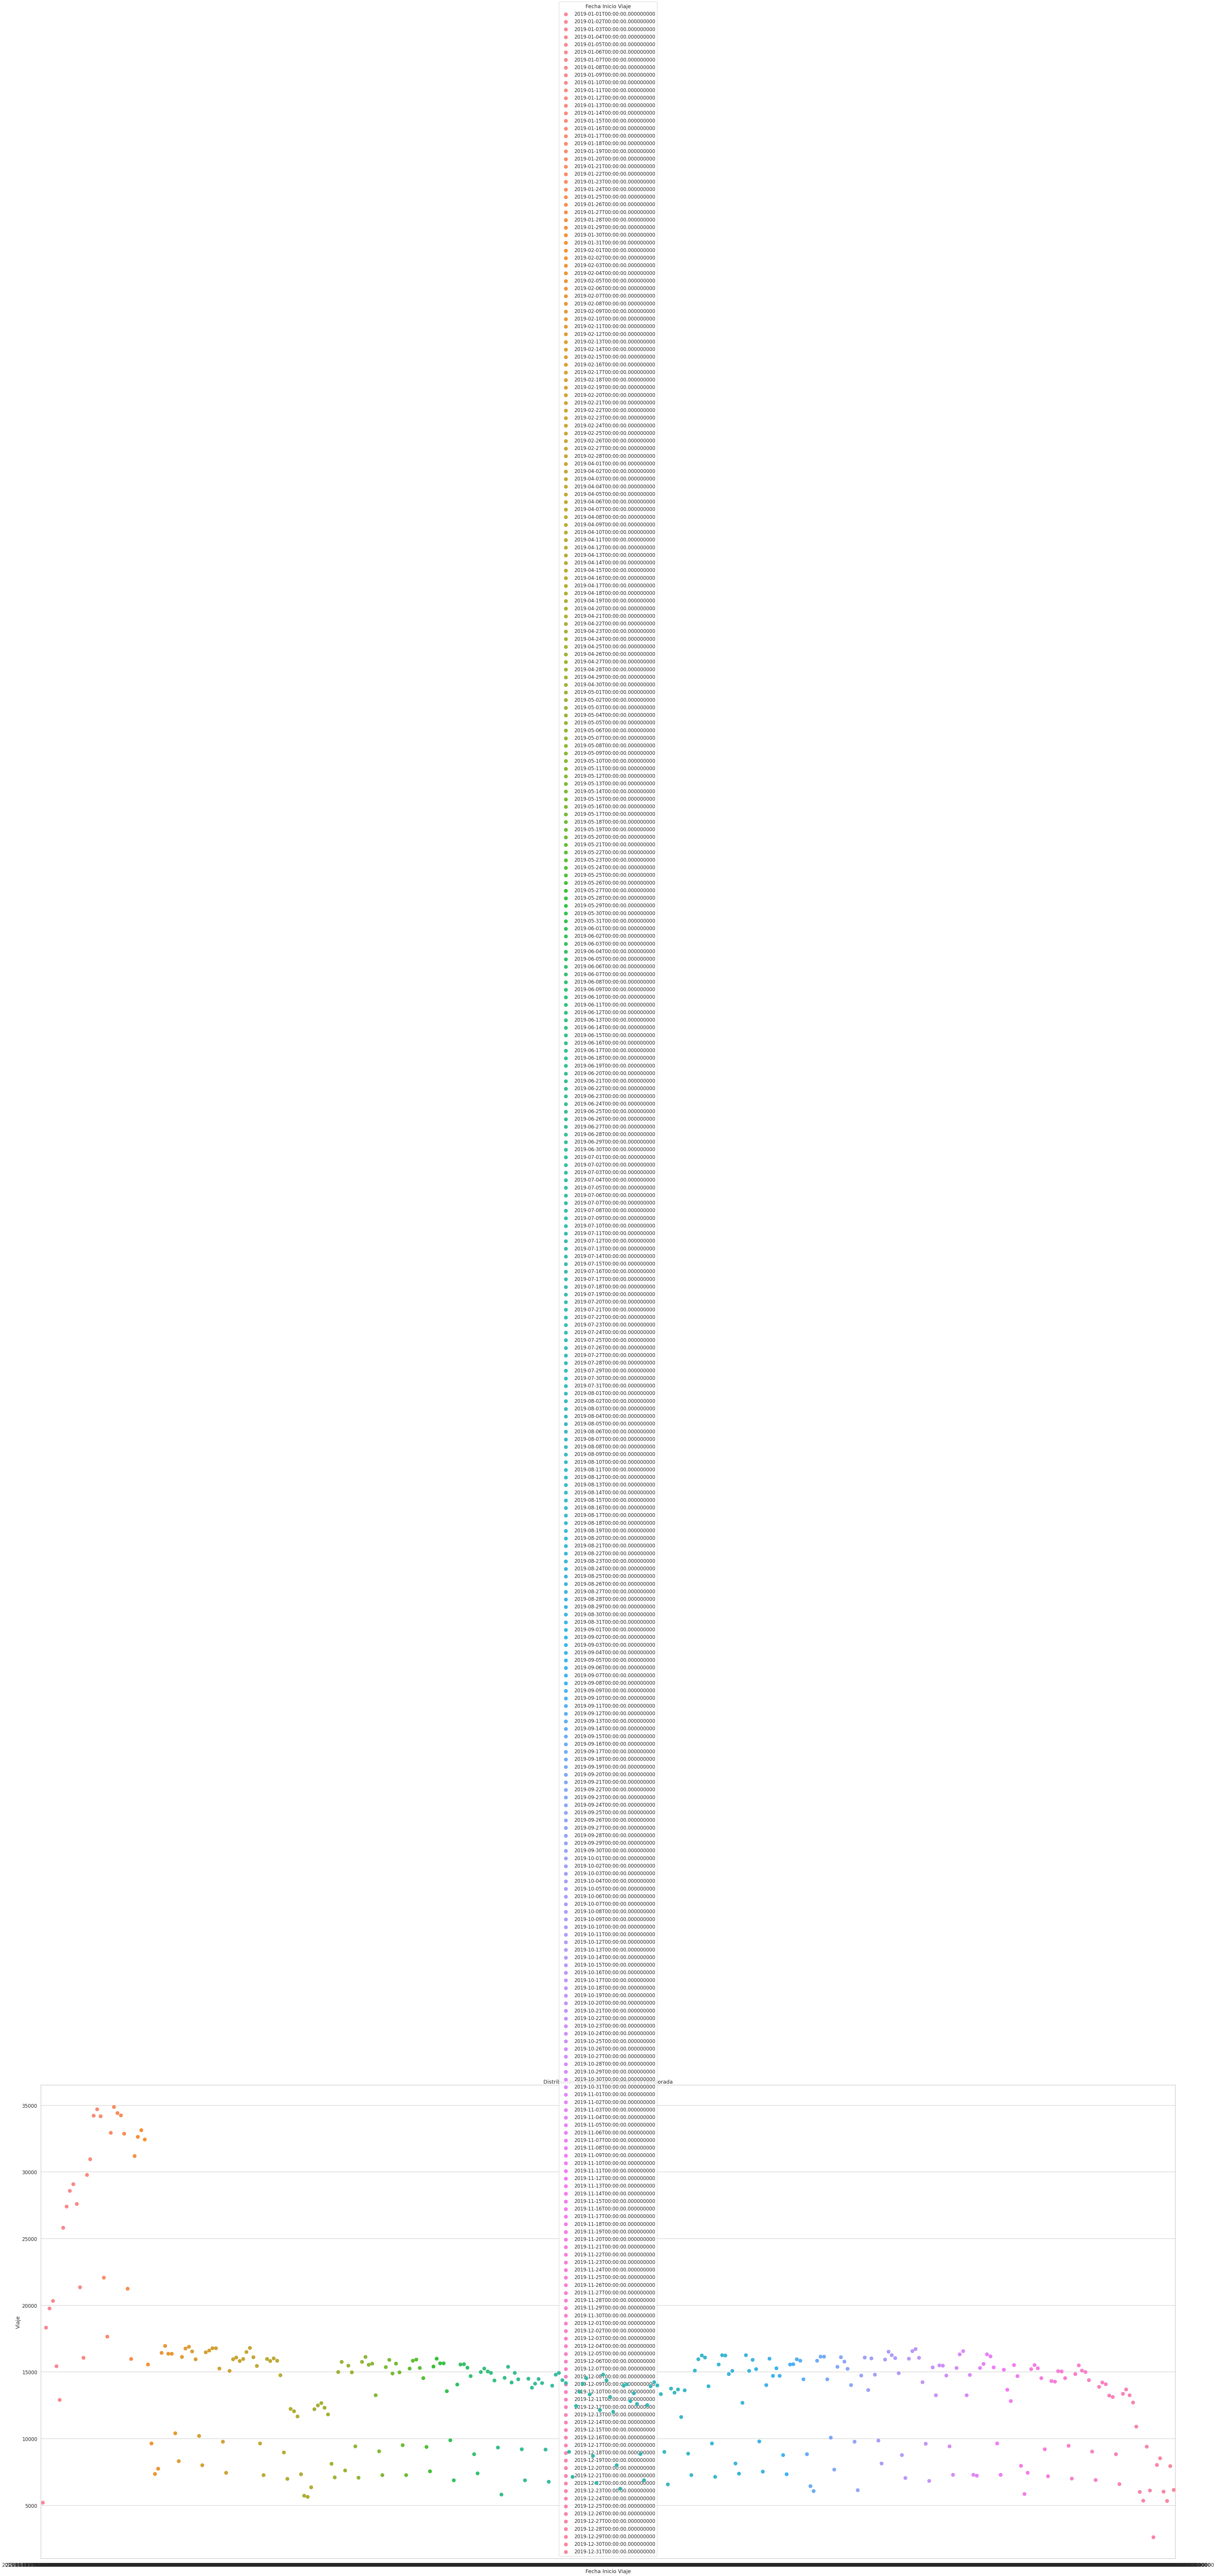

In [0]:
fig,ax = plt.subplots()
sn.pointplot(data=datos_mean_df[['Fecha Inicio Viaje',
                           'Viaje']],
             x='Fecha Inicio Viaje',y='Viaje',
             hue='Fecha Inicio Viaje',ax=ax,scale=1)
ax.set(title="Distribucion de viajes de acuerdo a la temporada")
fig.set_size_inches(70,30)

##Implementacion del modelo - Mean
Para esta primera parte primero analisaremos la informacion implementando arboles de desicion.

Mapeo de datos:
A continuacion se van a tranformar los valores de entrada en valores categoricos:


*   Fecha Inicio Viaje: Se agrupan por meses de 0 - 12 - Not make sense porque ya son meses
*   Fecha Fin Viaje: Se agrupan por meses de 0 - 12 - Not make sense porque ya son meses
*   Tiempo: Se agrupara en 4 catergorias de 4, 6, 8, 10
*   Viajes: Se agrupa en 3 categorias 0 - 2616, 1 - 10685, 2 -18754  #8069


In [0]:
print("Valor maximo:",max(datos_mean_df['Viaje']))
print("Valor minimo:",min(datos_mean_df['Viaje']))

Valor maximo: 34892
Valor minimo: 2616


In [0]:
#Obtener mes de fecha inicio viaje
df_fiv = datos_mean_df['Fecha Inicio Viaje'].apply(lambda x: x.strftime('%m'))
#Obtener mes de fecha fin viaje
df_ffv = datos_mean_df['Fecha Fin Viaje'].apply(lambda x: x.strftime('%m'))
df_t = []
#clasificar tiempo
for x in datos_mean_df['Tiempo']:
  if x <=4.0:
    df_t.append(0)
  elif x>=4.0 and x<6.0:
    df_t.append(1)
  elif x>=6.0 and x<8.0:
    df_t.append(2)
  elif x>=8.0:
    df_t.append(3)

#clasificar viajes
dt_v = []
for i in datos_mean_df['Viaje']:
  if i <= 2616:
    dt_v.append(0)
  elif i >2616 and i<=10685:
    dt_v.append(1)
  elif i>10685:
    dt_v.append(2)

#df['A'].apply(lambda x: x.strftime('%d%m%Y'))

In [0]:
new_df = pd.DataFrame()
new_df.insert(0,'Fecha Inicio Viaje',df_fiv,True)
new_df.insert(1,'Fecha Fin Viaje',df_ffv,True)
new_df.insert(2,'Temporada',datos_mean_df['Temporada'],True)
new_df.insert(3,'ID Origen',datos_mean_df['ID Origen'],True)
new_df.insert(4,'ID Destino',datos_mean_df['ID Destino'],True)
new_df.insert(5,'Tiempo',df_t,True)
new_df.insert(6,'Viajes',dt_v,True)


In [63]:
new_df.head()

,Fecha Inicio Viaje,Fecha Fin Viaje,Temporada,ID Origen,ID Destino,Tiempo,Viajes
0,01,01,1,50,50,1,1
1,02,02,1,51,51,3,2
2,03,03,1,51,51,1,2
3,04,04,1,51,51,2,2
4,05,05,1,51,51,1,2


In [0]:
new_df.dtypes

Fecha Inicio Viaje      object
Fecha Fin Viaje         object
Temporada             category
ID Origen             category
ID Destino            category
Tiempo                   int64
Viajes                   int64
dtype: object

In [0]:
datos_mean_df.dtypes

Fecha Inicio Viaje    datetime64[ns]
Fecha Fin Viaje       datetime64[ns]
Temporada                   category
ID Origen                   category
ID Destino                  category
Tiempo                       float64
Viaje                          int64
dtype: object

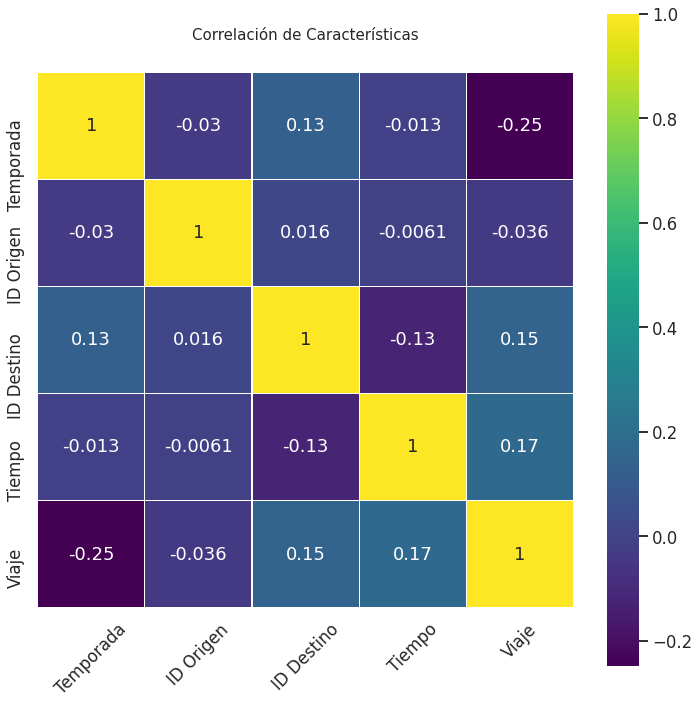

In [0]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12));
plt.title('Correlación de Características', y=1.05, size=15);
plt.xticks(rotation=45);
sn.heatmap(datos_mean_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

Como podemos apreciar no se encuentra demaciada relacion entre las variables por lo que sera necesario seguir trabajando en los datos para entrenar el arbol


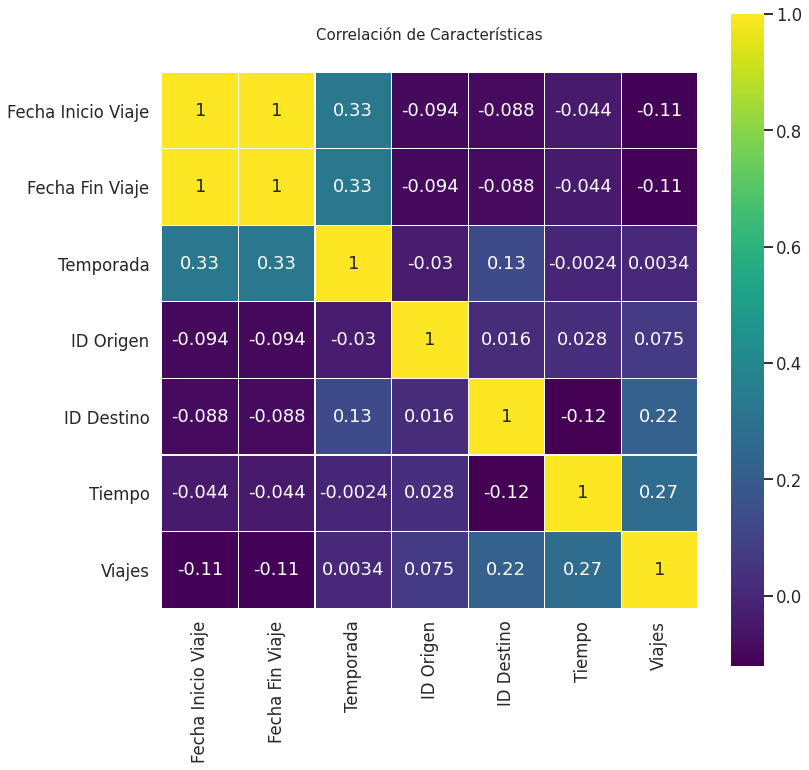

In [0]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12));
plt.title('Correlación de Características', y=1.05, size=15);
plt.xticks(rotation=45);
sn.heatmap(new_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

Podemos observar que aun la correlacion no es tan buena sin embargo mejoro bastante.
Por lo que proseguiremos con la implementacion del algoritmo.

Pero para poder continuar dividiremos el data set en
80(80.24) - 20(19.76) 
en donde 80 se utilizara train y el 20 para testing del modelo.


In [43]:
#Creacion de varios subgrupos con los datos de entrada
cv = KFold(n_splits=10)
accuracies = list()
max_attributes = len(list(new_df))
depth_range = range(1,max_attributes+1)

#Prueba del Nivel de Profundidad
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(new_df):
        f_train = new_df.loc[train_fold] 
        f_valid = new_df.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Viajes'], axis=1), 
                               y = f_train["Viajes"]) 
        valid_acc = model.score(X = f_valid.drop(['Viajes'], axis=1), 
                                y = f_valid["Viajes"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
#Mostrar los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.436275
         2          0.807754
         3          0.735740
         4          0.729768
         5          0.724866
         6          0.703654
         7          0.668360


De los resultados es posible observar que en 6 niveles de subgrupos se tiene el valor de precision mas alto con un 80%.
Por simplicidad se seleccionaran solo 2 niveles con una precision de aproximadamente 80% tambien.

In [0]:
#Creamos una copia del dataset para poder hacer pruebas con los datos normalizados y sin normalizar
new_df_copy = new_df.copy()

#Acomodamos de manera ramdom la informacion
#Convertimos el dataset en un array
dataset = np.array(new_df)
#Aplicamos la funcion shuffle
np.random.shuffle(dataset)


In [0]:
#Validamos el nuevo dataset que creamos
dataset

array([['08', '08', 3, ..., 51, 3, 2],
       ['09', '09', 3, ..., 51, 3, 2],
       ['12', '12', 1, ..., 50, 3, 1],
       ...,
       ['09', '09', 4, ..., 51, 1, 1],
       ['09', '09', 3, ..., 50, 2, 1],
       ['07', '07', 3, ..., 51, 2, 1]], dtype=object)

In [0]:
#Dividimos nuestras X
X = dataset[:,[0,1,2,3,4,5]]
#Dividimos nuestra Y
Y = dataset[:,[6]]
#Los convertimos en dataframe 
X_df = pd.DataFrame(X,columns=['Fecha Inicio Viaje','Fecha Fin Viaje','Temporada','ID Origen','ID Destino','Tiempo'])
Y_df = pd.DataFrame(Y,columns=['Viaje'])

In [0]:
#Validamos la conversion X
X_df.head()

,Fecha Inicio Viaje,Fecha Fin Viaje,Temporada,ID Origen,ID Destino,Tiempo
0,01,01,1,50,50,3
1,06,06,3,51,51,2
2,03,03,1,51,51,3
3,12,12,1,51,51,2
4,05,05,2,51,51,3


In [0]:
#Validamos la convercion de Y
Y_df.head()

,Viaje
0,2
1,2
2,2
3,2
4,2


In [0]:
#split datasets
#X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.30, random_state=42)
#print(X_train)
X = new_df[]

In [0]:
#Dividimos nuestro data set en entrenamientos y pruebas
x_train, x_test, y_train, y_test = train_test_split(X_df,Y_df,test_size=0.1976,random_state=42)

In [0]:
#type_of_target([0.1, 0.6])
x_train.astype('category')
type_of_target([0,1,2,3])

'multiclass'

In [64]:
#Vamos a droppear las variables que no demostraron tener tanta correlacion en la matriz
new_df.drop(['Fecha Inicio Viaje','Fecha Fin Viaje'],axis = 1, inplace = True)
#Corroboramos el data frame
new_df.head()

,Temporada,ID Origen,ID Destino,Tiempo,Viajes
0,1,50,50,1,1
1,1,51,51,3,2
2,1,51,51,1,2
3,1,51,51,2,2
4,1,51,51,1,2


In [49]:
#https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
#Creación de los arreglos de entrenamiento y las etiquetas que indican si llegó a top o no 
#Dividiremos en Test y Train
y = new_df['Viajes']
x = new_df.drop(['Viajes'], axis=1).values 

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0) 
#Creación del Árbol de Decisión con profundidad igual a 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 2,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

#Exportación del modelo a archivo ".dot"
with open("/content/Arbol.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(new_df.drop(['Viajes'], axis=1)),
                              #class_names = ['Temporada', 'Tiempo'],
                              rounded = True,
                              filled= True )
        
#Exportación del modelo a archivo ".png"
check_call(['dot','-Tpng','/content/Arbol.dot','-o',r'/content/Arbol.png'])
PImage("./Data_DT/Arbol.png")

El arbol resultante es el siguiente:
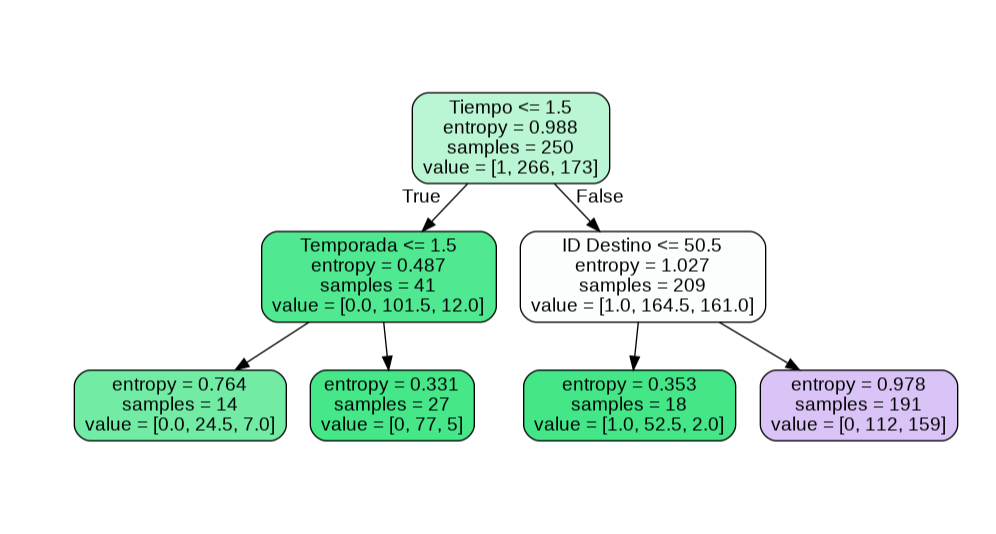

#Precicion del Arbol de desicion

In [50]:
#Precisión del Árbol de Decisión
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print("La precisión obtenida por el Árbol de Decisión es: %.2f"% acc_decision_tree +"%")

La precisión obtenida por el Árbol de Decisión es: 81.20%


In [55]:
#Predicción para el primer escenario

y_pred = decision_tree.predict(x_test)
y_proba = decision_tree.predict_proba(x_test)

#Impresión de los resultados
print("Prediccion de el arreglo de test")
print("Prediccion: " + str(y_pred))
print("Probabilidad de Acierto: " + str(round(y_proba[0][y_pred][0]* 100, 2))+"%")

Camila Cabello, canción titulada "Havana"
Prediccion: [2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2
 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 2 2 1 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2]
Probabilidad de Acierto: 58.67%


##K-NN
Es un metodo que busca en las observaciones mas cercanas a la que se esta tratando de predecir y clasificar el punto de interes basado en la mayoria de datos que le rodean. Es un algoritmo supervisado que esta basado en instancia.

Para esta segunda implementacion se tomara en cuenta las variables independientes (x): Temporada, ID Origen, 	ID Destino y 	Tiempo y como variable dependiente (y): Viajes    

In [65]:
#Revisemos los datos con los que contamos
#NOTA: SE UTILIZO EL MISMO MATEO ELABORADO PARA DT
new_df.head()

,Temporada,ID Origen,ID Destino,Tiempo,Viajes
0,1,50,50,1,1
1,1,51,51,3,2
2,1,51,51,1,2
3,1,51,51,2,2
4,1,51,51,1,2


In [0]:
#Importación de librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Definición de los valores X e y
X = new_df[['Temporada','ID Origen','ID Destino','Tiempo']].values
y = new_df['Viajes'].values

#Definición de los valores de enrtenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
#Asignación del valor k
n_neighbors = 4

#Definición del Clasificador
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

#Mostrar los valores de asertividad para el entrenamiento y la prueba
print('Asertividad del clasificador k-NN en el set de entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Asertividad del clasificador k-NN en el set de prueba: {:.2f}'
     .format(knn.score(X_test, y_test)))

Asertividad del clasificador k-NN en el set de entrenamiento: 0.82
Asertividad del clasificador k-NN en el set de prueba: 0.80


In [75]:
#Revisión de la precisión del modelo
pred = knn.predict(X_test)

#Mostrar los valores
print("Matriz de Confusión:\n", confusion_matrix(y_test, pred), "\n")
print("Reporte:\n", classification_report(y_test, pred), "\n")

Matriz de Confusión:
 [[12 11]
 [ 6 55]] 

Reporte:
               precision    recall  f1-score   support

           1       0.67      0.52      0.59        23
           2       0.83      0.90      0.87        61

    accuracy                           0.80        84
   macro avg       0.75      0.71      0.73        84
weighted avg       0.79      0.80      0.79        84
 



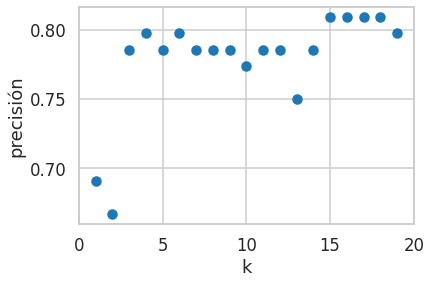

In [76]:
#Seleccion de K
#Algoritmo para la elección del valor k
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure();
plt.xlabel('k');
plt.ylabel('precisión');
plt.scatter(k_range, scores);
plt.xticks([0,5,10,15,20]);

Con esta grafica podemos apreciar como con valores de k=15 a k=19 es donde se obtiene mayor precision.